In [115]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [116]:
import requests
from bs4 import BeautifulSoup
import pickle

def url_to_transcript(url):
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="transcript-inner").find_all('p')]
    print(url)
    return text

urls = ['https://millercenter.org/the-presidency/presidential-speeches/january-20-1981-first-inaugural-address',
        'https://millercenter.org/the-presidency/presidential-speeches/january-21-1985-second-inaugural-address',
        'https://millercenter.org/the-presidency/presidential-speeches/january-20-1989-inaugural-address',
        'https://millercenter.org/the-presidency/presidential-speeches/january-20-1993-first-inaugural',
        'https://millercenter.org/the-presidency/presidential-speeches/january-20-1997-second-inaugural',
        'https://millercenter.org/the-presidency/presidential-speeches/january-20-2001-first-inaugural-address',
        'https://millercenter.org/the-presidency/presidential-speeches/january-20-2005-second-inaugural-address-0',
        'https://millercenter.org/the-presidency/presidential-speeches/january-20-2009-inaugural-address',
        'https://millercenter.org/the-presidency/presidential-speeches/january-21-2013-second-inaugural-address',
        'https://millercenter.org/the-presidency/presidential-speeches/january-20-2017-inaugural-address']

presidents = ['reagan1', 'reagan2', 'bushh', 'clinton1', 'clinton2', 'bushw1', 'bushw2', 'obama1', 'obama2', 'trump']

In [117]:
transcripts = [url_to_transcript(u) for u in urls]

https://millercenter.org/the-presidency/presidential-speeches/january-20-1981-first-inaugural-address
https://millercenter.org/the-presidency/presidential-speeches/january-21-1985-second-inaugural-address
https://millercenter.org/the-presidency/presidential-speeches/january-20-1989-inaugural-address
https://millercenter.org/the-presidency/presidential-speeches/january-20-1993-first-inaugural
https://millercenter.org/the-presidency/presidential-speeches/january-20-1997-second-inaugural
https://millercenter.org/the-presidency/presidential-speeches/january-20-2001-first-inaugural-address
https://millercenter.org/the-presidency/presidential-speeches/january-20-2005-second-inaugural-address-0
https://millercenter.org/the-presidency/presidential-speeches/january-20-2009-inaugural-address
https://millercenter.org/the-presidency/presidential-speeches/january-21-2013-second-inaugural-address
https://millercenter.org/the-presidency/presidential-speeches/january-20-2017-inaugural-address


In [118]:
for i, c in enumerate(presidents):
    with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

In [119]:
data = {}
for i, c in enumerate(presidents):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [120]:
data.keys()

dict_keys(['reagan1', 'reagan2', 'bushh', 'clinton1', 'clinton2', 'bushw1', 'bushw2', 'obama1', 'obama2', 'trump'])

In [121]:
data['reagan2'][:5]

['Senator Mathias, Chief Justice Burger, Vice President Bush, Speaker O\'Neill, Senator Dole, reverend clergy, and members of my family and friends and my fellow citizens:\r\nThis day has been made brighter with the presence here of one who, for a time, has been absent. Senator John Stennis, God bless you and welcome back.\r\nThere is, however, one who is not with us today. Representative Gillis Long of Louisiana left us last night. And I wonder if we could all join in a moment of silent prayer.\r\n[The President resumed speaking after a moment of silence. ]\r\nAmen.\r\nThere are no words adequate to express my thanks for the great honor that you\'ve bestowed on me. I\'ll do my utmost to be deserving of your trust.\r\nThis is, as Senator Mathias told us, the 50th time that we, the people, have celebrated this historic occasion. When the first President, George Washington, placed his hand upon the Bible, he stood less than a single day\'s journey by horseback from raw, untamed wildernes

In [122]:
# Let's take a look at out data again
next(iter(data.keys()))

'reagan1'

In [123]:
# Notice that our directory is currently in key: president, value: list 
next(iter(data.values()))

['Senator Hatfield, Mr. Chief Justice, Mr. President, Vice President Bush, Vice President Mondale, Senator Baker, Speaker O\'Neill, Reverend Moomaw, and my fellow citizens:\r\nTo a few of us here today this is a solemn and most momentous occasion, and yet in the history of our nation it is a commonplace occurrence. The orderly transfer of authority as called for in the Constitution routinely takes place, as it has for almost two centuries, and few of us stop to think how unique we really are. In the eyes of ma in the world, this every-4-year ceremony we accept as normal is nothing less than a miracle.\r\nMr. President, I want our fellow citizens to know how much you did to carry on this tradition. By your gracious cooperation in the transition process, you have shown a watching world that we are a united people pledged to maintaining a political system which guarantees individual liberty to a greater degree than any other, and I thank you and your people for all your help in maintainin

In [124]:
# We are going to change this to key: president, value: string format
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

In [125]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [126]:
# We can either keep it in dictionary format or put it into pandas dataset
import pandas as pd
pd.set_option('max_colwidth', 150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
bushh,"Mr. Chief Justice, Mr. President, Vice President Quayle, Senator Mitchell, Speaker Wright, Senator Dole, Congressman Michel, and fellow citizens, ..."
bushw1,"President Clinton, distinguished guests and my fellow citizens, the peaceful transfer of authority is rare in history, yet common in our country. ..."
bushw2,"Vice President Cheney, Mr. Chief Justice, President Carter, President Bush, President Clinton, reverend clergy, distinguished guests, fellow citiz..."
clinton1,"My fellow citizens, today we celebrate the mystery of American renewal. This ceremony is held in the depth of winter, but by the words we speak an..."
clinton2,"My fellow citizens, at this last Presidential Inauguration of the 20th century, let us lift our eyes toward the challenges that await us in the ne..."
obama1,"I stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne by our ancestors. I th..."
obama2,"\r\nVice President Biden, Mr. Chief Justice,\r\nmembers of the United States Congress, distinguished guests, and fellow citizens: \r\n \r\nEach t..."
reagan1,"Senator Hatfield, Mr. Chief Justice, Mr. President, Vice President Bush, Vice President Mondale, Senator Baker, Speaker O'Neill, Reverend Moomaw, ..."
reagan2,"Senator Mathias, Chief Justice Burger, Vice President Bush, Speaker O'Neill, Senator Dole, reverend clergy, and members of my family and friends a..."
trump,"Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans, and people of the world: thank you...."


In [127]:
# Let's take a look at the transcript for Obama
data_df.transcript.loc['obama1']

'I stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne by our ancestors. I thank President Bush for his service to our nation, as well as the generosity and cooperation he has shown throughout this transition.\r\nForty-four Americans have now taken the presidential oath. The words have been spoken during rising tides of prosperity and the still waters of peace. Yet, every so often the oath is taken amidst gathering clouds and raging storms. At these moments, America has carried on not simply because of the skill or vision of those in high office, but because We the People have remained faithful to the ideals of our forbearers, and true to our founding documents.\r\nSo it has been. So it must be with this generation of Americans.\r\nThat we are in the midst of crisis is now well understood. Our nation is at war, against a far-reaching network of violence and hatred. Our economy is badly weakened, a consequence of gree

In [128]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):

    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [129]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
bushh,mr chief justice mr president vice president quayle senator mitchell speaker wright senator dole congressman michel and fellow citizens neighbors ...
bushw1,president clinton distinguished guests and my fellow citizens the peaceful transfer of authority is rare in history yet common in our country with...
bushw2,vice president cheney mr chief justice president carter president bush president clinton reverend clergy distinguished guests fellow citizens on t...
clinton1,my fellow citizens today we celebrate the mystery of american renewal this ceremony is held in the depth of winter but by the words we speak and t...
clinton2,my fellow citizens at this last presidential inauguration of the century let us lift our eyes toward the challenges that await us in the next cen...
obama1,i stand here today humbled by the task before us grateful for the trust you have bestowed mindful of the sacrifices borne by our ancestors i thank...
obama2,\r\nvice president biden mr chief justice\r\nmembers of the united states congress distinguished guests and fellow citizens \r\n \r\neach time we...
reagan1,senator hatfield mr chief justice mr president vice president bush vice president mondale senator baker speaker oneill reverend moomaw and my fell...
reagan2,senator mathias chief justice burger vice president bush speaker oneill senator dole reverend clergy and members of my family and friends and my f...
trump,chief justice roberts president carter president clinton president bush president obama fellow americans and people of the world thank you we the ...


In [130]:
# Apply a second round of cleaning
def clean_text_round2(text):
    text = re.sub('[''""...]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [131]:
# Let's taake a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
bushh,mr chief justice mr president vice president quayle senator mitchell speaker wright senator dole congressman michel and fellow citizens neighbors ...
bushw1,president clinton distinguished guests and my fellow citizens the peaceful transfer of authority is rare in history yet common in our country with...
bushw2,vice president cheney mr chief justice president carter president bush president clinton reverend clergy distinguished guests fellow citizens on t...
clinton1,my fellow citizens today we celebrate the mystery of american renewal this ceremony is held in the depth of winter but by the words we speak and t...
clinton2,my fellow citizens at this last presidential inauguration of the century let us lift our eyes toward the challenges that await us in the next cen...
obama1,i stand here today humbled by the task before us grateful for the trust you have bestowed mindful of the sacrifices borne by our ancestors i thank...
obama2,\rvice president biden mr chief justice\rmembers of the united states congress distinguished guests and fellow citizens \r \reach time we gather ...
reagan1,senator hatfield mr chief justice mr president vice president bush vice president mondale senator baker speaker oneill reverend moomaw and my fell...
reagan2,senator mathias chief justice burger vice president bush speaker oneill senator dole reverend clergy and members of my family and friends and my f...
trump,chief justice roberts president carter president clinton president bush president obama fellow americans and people of the world thank you we the ...


In [132]:
# Let's take a look at our dataframe
data_df

,transcript
bushh,"Mr. Chief Justice, Mr. President, Vice President Quayle, Senator Mitchell, Speaker Wright, Senator Dole, Congressman Michel, and fellow citizens, ..."
bushw1,"President Clinton, distinguished guests and my fellow citizens, the peaceful transfer of authority is rare in history, yet common in our country. ..."
bushw2,"Vice President Cheney, Mr. Chief Justice, President Carter, President Bush, President Clinton, reverend clergy, distinguished guests, fellow citiz..."
clinton1,"My fellow citizens, today we celebrate the mystery of American renewal. This ceremony is held in the depth of winter, but by the words we speak an..."
clinton2,"My fellow citizens, at this last Presidential Inauguration of the 20th century, let us lift our eyes toward the challenges that await us in the ne..."
obama1,"I stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne by our ancestors. I th..."
obama2,"\r\nVice President Biden, Mr. Chief Justice,\r\nmembers of the United States Congress, distinguished guests, and fellow citizens: \r\n \r\nEach t..."
reagan1,"Senator Hatfield, Mr. Chief Justice, Mr. President, Vice President Bush, Vice President Mondale, Senator Baker, Speaker O'Neill, Reverend Moomaw, ..."
reagan2,"Senator Mathias, Chief Justice Burger, Vice President Bush, Speaker O'Neill, Senator Dole, reverend clergy, and members of my family and friends a..."
trump,"Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans, and people of the world: thank you...."


In [133]:
# Let's add the presidents' full names as well
full_names = ['Ronald Reagan', 'Ronald Reagan2', 'George H Bush', 'Bill Clinton', 'Bill Clinton2', 'George W Bush', 'George W Bush2', 'Barrack Obama', 'Barrack Obama2', 'Donald Trump']

data_df['full_name'] = full_names
data_df

,transcript,full_name
bushh,"Mr. Chief Justice, Mr. President, Vice President Quayle, Senator Mitchell, Speaker Wright, Senator Dole, Congressman Michel, and fellow citizens, ...",Ronald Reagan
bushw1,"President Clinton, distinguished guests and my fellow citizens, the peaceful transfer of authority is rare in history, yet common in our country. ...",Ronald Reagan2
bushw2,"Vice President Cheney, Mr. Chief Justice, President Carter, President Bush, President Clinton, reverend clergy, distinguished guests, fellow citiz...",George H Bush
clinton1,"My fellow citizens, today we celebrate the mystery of American renewal. This ceremony is held in the depth of winter, but by the words we speak an...",Bill Clinton
clinton2,"My fellow citizens, at this last Presidential Inauguration of the 20th century, let us lift our eyes toward the challenges that await us in the ne...",Bill Clinton2
obama1,"I stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne by our ancestors. I th...",George W Bush
obama2,"\r\nVice President Biden, Mr. Chief Justice,\r\nmembers of the United States Congress, distinguished guests, and fellow citizens: \r\n \r\nEach t...",George W Bush2
reagan1,"Senator Hatfield, Mr. Chief Justice, Mr. President, Vice President Bush, Vice President Mondale, Senator Baker, Speaker O'Neill, Reverend Moomaw, ...",Barrack Obama
reagan2,"Senator Mathias, Chief Justice Burger, Vice President Bush, Speaker O'Neill, Senator Dole, reverend clergy, and members of my family and friends a...",Barrack Obama2
trump,"Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans, and people of the world: thank you....",Donald Trump


In [134]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

In [136]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stopwords.
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,abandon,abandoned,abandonment,ability,able,abolished,abraham,abroad,absent,absolutism,...,yes,yesterday,yesterdays,yielded,yielding,yields,young,youngest,youth,youve
bushh,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,1,4,0,0,0
bushw1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
bushw2,2,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
clinton1,0,0,0,0,1,0,0,1,0,0,...,1,0,1,0,0,0,2,0,0,0
clinton2,0,0,0,0,0,1,0,0,0,0,...,4,0,0,0,0,0,1,0,0,0
obama1,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
obama2,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
reagan1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,2,0,0,1
reagan2,0,0,0,0,0,0,0,0,1,0,...,2,0,0,1,0,0,2,0,1,1
trump,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [137]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [138]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open ("cv.pkl", "wb"))

In [140]:
# Read the document term-matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,bushh,bushw1,bushw2,clinton1,clinton2,obama1,obama2,reagan1,reagan2,trump
abandon,0,0,2,0,0,0,0,0,0,0
abandoned,0,0,0,0,0,1,0,0,0,0
abandonment,0,1,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,1,0,0,0,0
able,0,0,0,1,0,0,0,0,0,0


In [142]:
# Find the top 30 words said by each President
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
    
top_dict

{'bushh': [('new', 14),
  ('nation', 10),
  ('great', 10),
  ('world', 10),
  ('free', 9),
  ('hand', 8),
  ('good', 8),
  ('friends', 8),
  ('things', 8),
  ('today', 7),
  ('need', 7),
  ('day', 7),
  ('time', 7),
  ('work', 7),
  ('america', 7),
  ('people', 7),
  ('strong', 6),
  ('dont', 6),
  ('freedom', 6),
  ('make', 6),
  ('president', 6),
  ('old', 6),
  ('mr', 6),
  ('know', 6),
  ('government', 5),
  ('better', 5),
  ('love', 5),
  ('breeze', 5),
  ('word', 5),
  ('like', 5)],
 'bushw1': [('citizens', 9),
  ('country', 9),
  ('story', 9),
  ('america', 8),
  ('nation', 8),
  ('nations', 5),
  ('new', 5),
  ('freedom', 5),
  ('americans', 5),
  ('courage', 5),
  ('promise', 5),
  ('know', 5),
  ('common', 5),
  ('power', 4),
  ('work', 4),
  ('american', 4),
  ('character', 4),
  ('duty', 4),
  ('public', 4),
  ('time', 4),
  ('best', 4),
  ('purpose', 4),
  ('civility', 4),
  ('children', 4),
  ('live', 4),
  ('government', 4),
  ('ideals', 4),
  ('compassion', 3),
  ('god'

In [149]:
# Print the top 15 words said by each president
for presidents, top_words in top_dict.items():
    print(presidents)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

bushh
new, nation, great, world, free, hand, good, friends, things, today, need, day, time, work
---
bushw1
citizens, country, story, america, nation, nations, new, freedom, americans, courage, promise, know, common, power
---
bushw2
freedom, liberty, america, nation, world, americans, americas, country, free, history, time, work, justice, day
---
clinton1
world, america, people, today, americans, new, let, change, time, work, nation, fellow, idea, american
---
clinton2
new, century, nation, time, land, people, america, promise, world, government, american, let, citizens, work
---
obama1
nation, new, america, people, today, let, time, common, work, know, world, generation, spirit, day
---
obama2
applause, people, time, america, make, country, american, today, freedom, generation, new, citizens, equal, nation
---
reagan1
government, believe, people, americans, freedom, time, world, work, nation, america, man, let, called, heroes
---
reagan2
people, government, world, freedom, time, new,

In [150]:
# Look at the most common top words ---> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each President
words = []
for presidents in data.columns:
    top = [word for (word, count) in top_dict[presidents]]
    for t in top:
        words.append(t)
        
words

['new',
 'nation',
 'great',
 'world',
 'free',
 'hand',
 'good',
 'friends',
 'things',
 'today',
 'need',
 'day',
 'time',
 'work',
 'america',
 'people',
 'strong',
 'dont',
 'freedom',
 'make',
 'president',
 'old',
 'mr',
 'know',
 'government',
 'better',
 'love',
 'breeze',
 'word',
 'like',
 'citizens',
 'country',
 'story',
 'america',
 'nation',
 'nations',
 'new',
 'freedom',
 'americans',
 'courage',
 'promise',
 'know',
 'common',
 'power',
 'work',
 'american',
 'character',
 'duty',
 'public',
 'time',
 'best',
 'purpose',
 'civility',
 'children',
 'live',
 'government',
 'ideals',
 'compassion',
 'god',
 'service',
 'freedom',
 'liberty',
 'america',
 'nation',
 'world',
 'americans',
 'americas',
 'country',
 'free',
 'history',
 'time',
 'work',
 'justice',
 'day',
 'citizens',
 'know',
 'human',
 'hope',
 'seen',
 'people',
 'cause',
 'rights',
 'tyranny',
 'came',
 'character',
 'good',
 'long',
 'life',
 'united',
 'states',
 'world',
 'america',
 'people',
 'toda

In [147]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in 
Counter(words).most_common()

[('america', 10),
 ('nation', 9),
 ('time', 9),
 ('work', 9),
 ('people', 9),
 ('new', 8),
 ('world', 8),
 ('today', 8),
 ('government', 8),
 ('americans', 8),
 ('freedom', 6),
 ('citizens', 6),
 ('american', 6),
 ('let', 6),
 ('great', 5),
 ('god', 5),
 ('day', 4),
 ('make', 4),
 ('know', 4),
 ('country', 4),
 ('power', 4),
 ('president', 3),
 ('children', 3),
 ('history', 3),
 ('human', 3),
 ('generation', 3),
 ('free', 2),
 ('good', 2),
 ('things', 2),
 ('strong', 2),
 ('old', 2),
 ('promise', 2),
 ('common', 2),
 ('character', 2),
 ('service', 2),
 ('liberty', 2),
 ('americas', 2),
 ('long', 2),
 ('life', 2),
 ('united', 2),
 ('states', 2),
 ('fellow', 2),
 ('come', 2),
 ('spirit', 2),
 ('peace', 2),
 ('believe', 2),
 ('years', 2),
 ('act', 2),
 ('national', 2),
 ('federal', 2),
 ('heart', 2),
 ('hand', 1),
 ('friends', 1),
 ('need', 1),
 ('dont', 1),
 ('mr', 1),
 ('better', 1),
 ('love', 1),
 ('breeze', 1),
 ('word', 1),
 ('like', 1),
 ('story', 1),
 ('nations', 1),
 ('courage', 1

In [151]:
#If more than half the Presidents have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['america',
 'nation',
 'time',
 'work',
 'people',
 'new',
 'world',
 'today',
 'government',
 'americans']

In [154]:
# Let's update our document-term matrix with new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [160]:
# Let's make some word clouds!
# Terminal Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

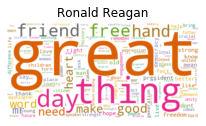

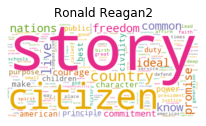

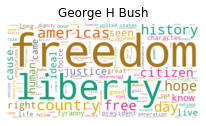

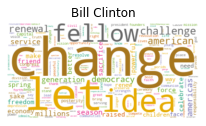

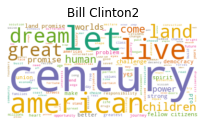

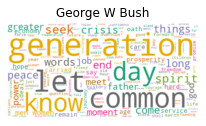

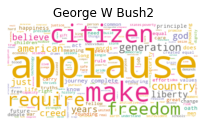

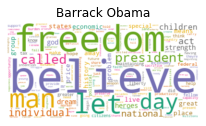

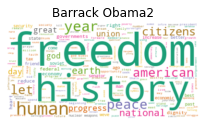

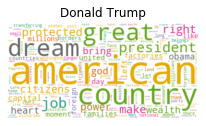

In [162]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ronald Reagan', 'Ronald Reagan2', 'George H Bush', 'Bill Clinton', 'Bill Clinton2', 'George W Bush', 'George W Bush2', 'Barrack Obama', 'Barrack Obama2', 'Donald Trump']

#Create subplots for each president
for index, presidents in enumerate(data.columns):
    wc.generate(data_clean.transcript[presidents])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    plt.show()